# <font color='Red'> *Uncorrelated* Error Propagation Lab </font>

#   <font color='Red'> Matt Saporito  </font>

#  <font color='Red'> 10/4/2022  </font>

#   <font color='Green'> Objective  </font>

### <font color='Green'> The objective here is from a theory $f(\xi_i)$ on variables $\xi_i$, to derive errors/uncertainties from their *uncorrelated* errors/uncertainties, i.e. $\delta \xi_i = \sigma_i$. </font>


<font color='Green'>
Correlated Errors, for instance, are slightly more complicated and beyond the scope of this lab.

The Theory will describe how to, different theories will yield different errors. Theories which have smaller errors are tenatively more correct.</font>

#   <font color='Green'> 00. Introduction  </font>

### <font color='Green'> Let's begin as always by introducing the libraries we'll use </font>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

π = np.pi

def Normal(x, σ, μ):
    return 1/np.sqrt(2*π*σ**2) * np.exp( - (x-μ)**2/(2*σ**2) )

### Notation

### For These labs we consider numbers $\mu_A, \mu_B, \mu_C$ with their associated errors $\sigma_A, \sigma_B, \sigma_C$ respectively.

### And $A, B, C$ to represent stochastic data, i.e. these are 1-dimensional NumPy arrays, associtated with many measurements of a certain value. Their average is given by: \begin{align}
\mu_A &= \langle A \rangle = \frac{\sum_i A_i}{\texttt{len}(A)}\quad\quad.
\end{align}
### Whilst their variance is given by: \begin{align}
\sigma_A^2 &= \langle A^2 \rangle - \langle A \rangle^2  = \frac{\sum_i A^2_i}{\texttt{len}(A)} - \langle A \rangle^2 \quad\quad.
\end{align}

### An important function for this lab is the Gaussian/Normal distribution. It is a *central* disribution (most of its values are in the center), and is among the most important functions in science, math, and physics. Its defined by 2 parameters $\sigma$ (the standard deviation) and $\mu$ (the center-point). Here $\mu$ represents the average value, and $\sigma$ the error for any measurement. The functional form of this function is: \begin{align}
f(x) &= \frac{1}{\sqrt{2\pi\sigma^2}}\,\exp{\left( -\frac{(x-\mu)^2}{2\sigma^2} \right)} = \texttt{Normal}\left( x, \sigma, \mu \right) \\
\text{such that}\quad\quad &\int_{(-∞, +∞)} f(x) \,dx = 1
\end{align}
### A few examples of this function may be plotted:

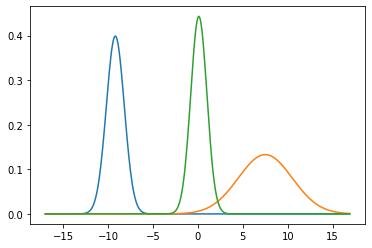

In [32]:
dx = 0.1
x  = np.arange(-17,17,dx)
plt.plot( x , Normal(x, 1.0, -9.2) )
plt.plot( x , Normal(x, 3.0, 7.5) )
plt.plot( x , Normal(x, 0.9, 0.1) )
plt.show()

### If we suppose that the errors are given by a Gaussian/Normal distribution, then we may proceed with our Error Analysis.

### Suppose we have a theory on how various variables are related, let's call this quantity of interest $f$, and it is a function of these variables. Suppose these variables are $A$, $B$, and $C$, *without loss of generality* (w.l.o.g.):
## \begin{align}
f(A, B, C)\quad\quad.
\end{align}
### But each of these variables carry their own error $\sigma_A$, $\sigma_B$, and $\sigma_C$ respectively. How then does one devise the error of $\sigma_f$? 

### For **Uncorrelated** errors may be solved for using, with the derivatives evaluated at the average (for either addition (absolute error) XOR multication (relative error)):

*   ## Addition/Subtraction (absolute error) 

### \begin{align*}
\sigma_{f}^2 &= \left(\frac{\partial f}{\partial A}\bigg|_{A\rightarrow \mu_A}\right)^2 \sigma_{A}^{2}+\left(\frac{\partial f}{\partial B}\bigg|_{B\rightarrow \mu_B}\right)^2 \sigma_{B}^{2}+\left(\frac {\partial f}{\partial C} \bigg|_{C\rightarrow \mu_C} \right)^2 \sigma_{C}^{2} + \cdots  \\
\sigma_f &= \sqrt{\sum_i \left(\frac{\partial f}{\partial \xi_i} \bigg|_{\xi_i\rightarrow \mu_i}\right)^2 \sigma_i^2 }
\end{align*}

*   ## Multication/Division/Exponential (relative error)

### \begin{align*}
\frac{\sigma_{f}^2}{f^2} &= \left(\frac{\partial f}{\partial A}\bigg|_{A\rightarrow \mu_A}\right)^2 \sigma_{A}^{2}+\left(\frac{\partial f}{\partial B}\bigg|_{B\rightarrow \mu_B}\right)^2 \sigma_{B}^{2}+\left(\frac {\partial f}{\partial C} \bigg|_{C\rightarrow \mu_C} \right)^2 \sigma_{C}^{2} + \cdots  \\
\frac{\sigma_f}{f} &= \sqrt{\sum_i \left(\frac{\partial f}{\partial \xi_i} \bigg|_{\xi_i\rightarrow \mu_i}\right)^2 \sigma_i^2 }
\end{align*}

### over the function $f$ as an arbtirary function of variables $\xi_i$ and uncertainties $\sigma_i$.



#   <font color='Green'> 0. $f=A+B$  </font>

### <font color='Green'> Let $A$ and $B$ be datasets defined below.  </font> 

### <font color='Green'> \begin{align*}
\frac{ \partial f(A,B) }{ \partial A } &= 1 \quad\quad, \\
\frac{ \partial f(A,B) }{ \partial B } &= 1 \quad\quad, \\
\therefore\quad\quad \sigma_f^2 &= \left(1\right)^2 \sigma_{A}^{2}+\left(1\right)^2 \sigma_{B}^{2} \quad\quad, \\
\sigma_f &= \sqrt{ \sigma_{A}^{2} + \sigma_{B}^{2} }\quad\quad.
\end{align*} </font> 

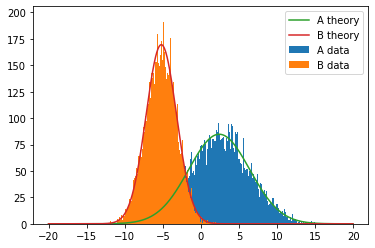

In [19]:
σ1 =  4.0
σ2 =  2.0
μ1 =  2.4
μ2 = -5.2

dx = 0.05
x  = np.arange(-20,20,dx)

N  = 17000
A = np.random.normal(μ1, σ1, N)
B = np.random.normal(μ2, σ2, N)

plt.hist(A, bins=x, label="A data")
plt.hist(B, bins=x, label="B data")

plt.plot( x , Normal(x, σ1, μ1) * N * dx, label="A theory")
plt.plot( x , Normal(x, σ2, μ2) * N * dx, label="B theory")
plt.legend()
plt.show()

Fig 1: The graph above describes two data sets which follow a Gaussian, or normal, distribution. That is, the distribution is a continuous probability that is symmetrical around the peak. It can be seen that the data in each set has a peak at the center point, represented by 𝜇 and standard deviation, 𝜎, to the left and right of 𝜇. The standard deviation is defined as the square root of the variance, 𝜎𝑓, and therefore must be a positive number. Assigning a negative number to 𝜎 yields the syntax error "scale less than zero". Data that follow this trend can be analyzed to find the absolute and relative error. Increasing the number of data points, N, helps to ensure the data is normally distributed. Data set B has a lower standard deviation than data set A, as shown in Fig 1. While examining Newton's 1st Law in Lab 1, the equation v_t[t] = v_t[t-1] + (a_t[t] + a_t[t-1])/2  * Δt was used to analyze the velocity of a particle as a function of time. This experiment required taking both velocity and time data, each measurement having levels of precision and error that were independent of eachother. 

### <font color='Green'> What is the sum of these two numbers with their error?  </font> 


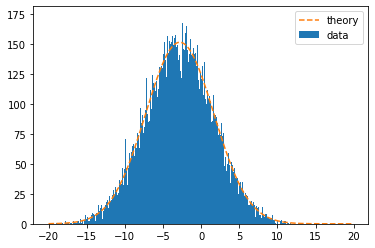

In [ ]:
plt.hist(A + B, bins=x, label="data")
σ = np.sqrt(σ1**2 + σ2**2)
μ = μ1 + μ2

#plt.plot(x, Normal(x, σ1, μ) * N * dx, linestyle="dashed", label="incorrect")
plt.plot(x, Normal(x, σ, μ) * N * dx, linestyle="dashed", label="theory")
plt.legend()
plt.show()

Fig 2: Adding quantities with error adds the absolute errors in quadrature yielding the absolute error of the sum. This graph describes the absolute error of data sets 1 and 2 from Fig 1. That is, \begin{align*}
\
\sigma_f &= \sqrt{ \sigma_{A}^{2} + \sigma_{B}^{2} }\quad\quad
\end{align*}

For example, two variables of different measured precision need to be added together to get a total value. One variable is measured to be have a value of 0.5 and another variable is measured to have a value of 0.01. Each of these measurements have a different level of error associated with them and adding quantities in error yield the absolute error of the sum. Again using the equation, v_t[t] = v_t[t-1] + (a_t[t] + a_t[t-1])/2  * Δt from Lab 1 as an example, v and a are added in the equation. Each of these values have degrees of error associated with them and adding them together produces the absolute error of the sum of the two data sets. 

#   <font color='Red'> Data Sets  </font>

### <font color='Red'> Here let's define two data sets to be used in uncorrelated error propagation.</font> 

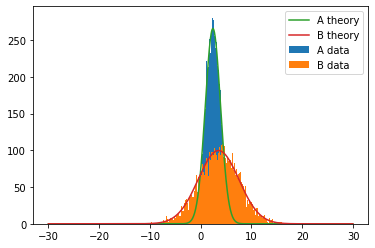

In [27]:
σ1 =  1.5
σ2 =  4.0
μ1 =  2.4
μ2 = 3.5

dx = 0.05
x  = np.arange(-30,30,dx)

N  = 20000
A = np.random.normal(μ1, σ1, N)
B = np.random.normal(μ2, σ2, N)

plt.hist(A, bins=x, label="A data")
plt.hist(B, bins=x, label="B data")

plt.plot( x , Normal(x, σ1, μ1) * N * dx, label="A theory")
plt.plot( x , Normal(x, σ2, μ2) * N * dx, label="B theory")
plt.legend()
plt.show()

Fig 3: The graph above describes two data sets which follow a Gaussian, or normal, distribution. That is, the distribution is a continuous probability that is symmetrical around the peak. In the experiment there were N number of data points collected, 20,000 in this case. It was found that mean value for data set A was 2.4 and for B was 3.5. The standard deviation, σ1 was 1.5 and σ2 was 4.0. For the subsequent analysis, it is assumed the variables are uncorrelated. That is, each variable has uncertainties that are unrelated to eachother. While examining Newton's 1st Law in Lab 1, the equation v_t[t] = v_t[t-1] + (a_t[t] + a_t[t-1])/2  * Δt was used to analyze the velocity of a particle as a function of time. This experiment required taking both velocity and time data, each measurement having levels of precision and error that are independent of eachother. 

#   <font color='Red'> 1. $f=aA$  </font>

### <font color='Red'> Let $a$ be some constant and $A$ be a dataset. </font> 

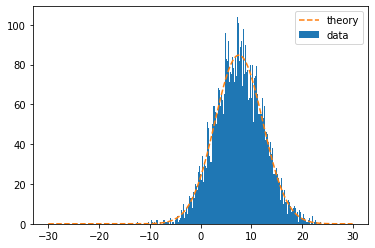

In [28]:
a = 3.14

plt.hist(a*A, bins=x, label="data")
σ = np.sqrt(a**2 * σ1**2)
μ = a * μ1

#plt.plot(x, Normal(x, σ1, μ) * N * dx, linestyle="dashed", label="incorrect")
plt.plot(x, Normal(x, σ, μ) * N * dx, linestyle="dashed", label="theory")
plt.legend()
plt.show()

Fig 4: This graph describes the standard deviation of dataset A multiplied by constant A. Multiplying a dataset by a constant will increase the standard deviation by a factor of a, in this case 3.5. This can be verified by changing the value of a and observing the subsequent standard deviation of dataset A. An example of multiplying a dataset by a constant would be multiplying a value by pi or g. Another example used in previous labs was multiplying a constant mass by an array of accelerations to get forces over a particular interval.  

#   <font color='Red'> 2. $f = aA + bB$  </font>

### <font color='Red'> Let $a,b$ be some constants and $A,B$ be a datasets. </font> 

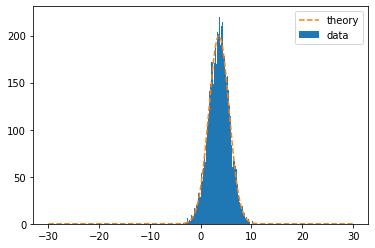

In [29]:
a = 1.25
b = 0.17

plt.hist(a*A + b*B, bins=x, label="data")
μ = a*μ1 + b*μ2
σ = np.sqrt( a**2 * σ1**2 + b**2 * σ2**2 )   ## error propagation here

plt.plot(x, Normal(x, σ, μ) * N * dx, linestyle="dashed", label="theory")
plt.legend()
plt.show()

Fig 5: This graph describes the propagation of error when multiplying datasets A and B by constants a and b then adding them together. When multiplying by a constant, the standard deviation (error about the mean) is changed by a factor of the constant. In this case, the constants are a = 1.25 and b = 0.17. In lab 3, the friction component, Fnet, was found to equal f_fric + f_normal + f_z + f_in. In this case, it was necessary to multiply the normal force by by μS and μK, each of which would have associated errors.

#   <font color='Red'> 3. $f = A * B$  </font>

### <font color='Red'> Let $A,B$ be a datasets. </font> 

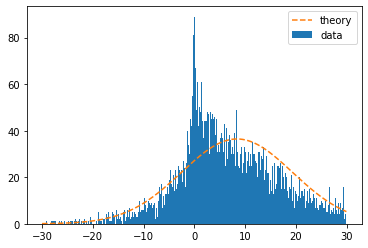

In [30]:
plt.hist(A*B, bins=x, label="data")
μ = μ1 * μ2
σ = np.sqrt( μ**2 * ((σ1/μ1)**2 + (σ2/μ2)**2) )   ## error propagation here

plt.plot(x, Normal(x, σ, μ) * N * dx, linestyle="dashed", label="theory")
plt.legend()
plt.show()

Fig 6: When multiplying or dividing datasets with error, the relative error is added in quadrature to get the relative error of the sum. This is in contrast to adding two datasets with error which yields the absolute error of the sum. It should be noted that multiplying A * B affects the size of the standard deviation. In lab 1, when examining the position of particle, it was necessary to multiply a time array by a velocity array in order to solve the kinematic equation for position. An error in each of these measurements multiplied together would increase the variance and thus the standard deviation from the mean. 

#   <font color='Red'> 4. $f = a A^b $  </font>

### <font color='Red'> Let $a,b$ be constants and $A$ be a dataset. </font> 

\begin{align*}
\mu &= a\mu_1^b \\
\sigma_f &=  \frac{\mu b \sigma_A}{\mu_A} \\ 
\end{align*}

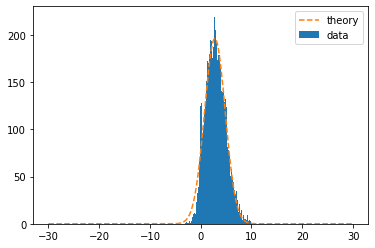

In [31]:
b = 1.17

plt.hist( (A.astype(np.complex128)**(b)).real , bins=x, label="data")
μ = μ1**(b)
σ = ( μ*b*σ1 ) / μ1   ## error propagation here

plt.plot(x, Normal(x, σ, μ) * N * dx, linestyle="dashed", label="theory") ### negative numbers have a complex value
plt.legend()
plt.show()

Fig 7: In this case, dataset A is multiplied by exponent b and a where a and b are both constants. Multiplying a dataset by a constant will increase the standard deviation by a factor of a which has been verified in a previous condition. Multiplying a dataset by an exponent (where the exponent does not have error) the product of the relative error and the absolute value of the exponent is produced. In the circular motion lab, the equation F=(mv^2)/r was analyzed. In this case v (a variable with measurement error) is multiplied by a constant, m, and raised to the power of 2. 

## Conclusion ##

In this lab, uncertainty propagation and error analysis was studied. A normal distribution was defined and graphically presented. Subsequentally, various forms of error propagation were examined. Propagation of error is an important and unavoidable feature of quantitative data analysis. Given the fact that each variable has an associated uncertainty associated with it, sources of error can quickly skew experimental results from acceptable values. As such, it is important to be able to analyze laboratory data rigorously so that the experimenter can be confident that the collected data is valid and reliable. 